# **Testing Out Different Import Methods**




*   **Kaggle API Imports**
*   **Collab File Imports**



In [ ]:
! pip install -q kaggle

In [ ]:
 !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
 !chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other


## Unzipping Files If Necessary

In [ ]:
#If you need to unzip using kaggle - change collab file name to avoid prompt
! unzip 'walmart-sales-dataset.zip'


Archive:  walmart-sales-dataset.zip
  inflating: walmart.csv             


# **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Lets make sure we can see all the columns
pd.set_option('display.max_columns', 20)

In [ ]:
# File System uploaded directly into Collab
# Will it remain on a refresh or close and open? So far yes however you did upload the files into the directory as well

file = ('/content/walmart.csv')

df = pd.read_csv(file)


# We have columns and indexes (0,1,2,3..)

In [ ]:
df.shape
# Lets look at the rows x columns (mxn)

# So we have 5.6 million rows, 10 columns


(550068, 10)

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
# Lets see how many unique values are in each column
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [ ]:
df.dtypes  # Lets zoom in a little

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


## Data Desciption


*    **It looks like there are 3631 unique products across the 5.5 million unique products**

*    **Cities have been masked into categories A, B, C - which would be useful if made more descriptive**

*    **Marital status is a bool**

*    **Occupation is described via a series of numbers rather than categories**

*    **Product categories are mased 1 - 12. Is it possible to determine what their true categories would be?**

*    **Ages are binned i.e. 0-17, 18-25, 26-35, 36-45, 46-50, 55+**

*    **Purchase amounts are the sum spent**




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

In [ ]:
df.head()

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.loc[df.duplicated()]
# No EXACT duplicates

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum


In [ ]:
# Lets check by a specific Feature

df.loc[df.duplicated(subset=['UserID'])]

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Maybe use `groupby` to understand how many purchases each UserID has done and add that as a new column as part of the feature engineering work. Could do the same with the `ProductID`.

In [ ]:
user_frequency = df.groupby('UserID').size().reset_index(name='UserFrequency')
user_frequency.head()

,UserID,UserFrequency
0,1000001,35
1,1000002,77
2,1000003,29
3,1000004,14
4,1000005,106


In [ ]:
product_frequency = df.groupby('ProductID').size().reset_index(name='ProductFrequency')
product_frequency.head()

,ProductID,ProductFrequency
0,P00000142,1152
1,P00000242,376
2,P00000342,244
3,P00000442,92
4,P00000542,149


In [ ]:
df = df.merge(product_frequency, on='ProductID', how='left')
df = df.merge(user_frequency, on='UserID', how='left')
df.head()

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum,ProductFrequency,UserFrequency
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,227,35
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,581,35
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,102,35
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,341,35
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,203,77


________________________________________________________

In [ ]:
# Examining User ID behavior

df.query('UserID == 1000004')

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum,ProductFrequency,UserFrequency
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,1440,14
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,593,14
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,912,14
39188,1000004,P00046742,M,46-50,7,B,2,1,1,15852,1438,14
155580,1000004,P00329542,M,46-50,7,B,2,1,1,3849,708,14
194565,1000004,P00114942,M,46-50,7,B,2,1,1,19120,1178,14
233733,1000004,P00025442,M,46-50,7,B,2,1,1,19693,1615,14
272819,1000004,P00112542,M,46-50,7,B,2,1,1,15485,1131,14
350810,1000004,P00112142,M,46-50,7,B,2,1,1,11765,1562,14
390161,1000004,P00318742,M,46-50,7,B,2,1,1,15853,759,14


In [ ]:
# If looking for an inverse i.e. a set of COLUMNS not queriable variable that are not duplicated or unique can use ~before  df.loc[~df.duplicated(subset=['UserID','Age'])]
df.loc[~df.duplicated(subset=['UserID','Age'])]  #.reset_index(drop=True) if you need to reset index plus drop previous index
#df.duplicated(subset=['UserID','Age'])
#Or get the sum of a series of duplicates
#df.duplicated(subset=['UserID','Age']).sum()

,UserID,ProductID,Gender,Age,Occupation,City,YearsOfResidence,MaritalStatus,ProductCategory,ReceiptSum,ProductFrequency,UserFrequency
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,227,35
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,203,77
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,615,29
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,1440,14
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,793,106
...,...,...,...,...,...,...,...,...,...,...,...,...
185450,1004588,P00260042,F,26-35,4,C,0,0,5,8707,754,20
187076,1004871,P00242742,M,18-25,12,C,2,0,1,15389,1215,12
221494,1004113,P00351842,M,36-45,17,C,3,0,5,5183,171,20
229480,1005391,P00339342,M,26-35,7,A,0,0,1,15831,186,7


# Let's Look At The Data

In [ ]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum',
       'ProductFrequency', 'UserFrequency'],
      dtype='object')

In [ ]:
#df['ReceiptSum'].value_counts().head(10)

In [ ]:
df['ReceiptSum'].value_counts().plot(kind='bar', title = 'Distribution of Amount Spent')


<Axes: title={'center': 'Distribution of Amount Spent'}, xlabel='ReceiptSum'>

Error in callback <function flush_figures at 0x7dc865375090> (for post_execute):


KeyboardInterrupt: 

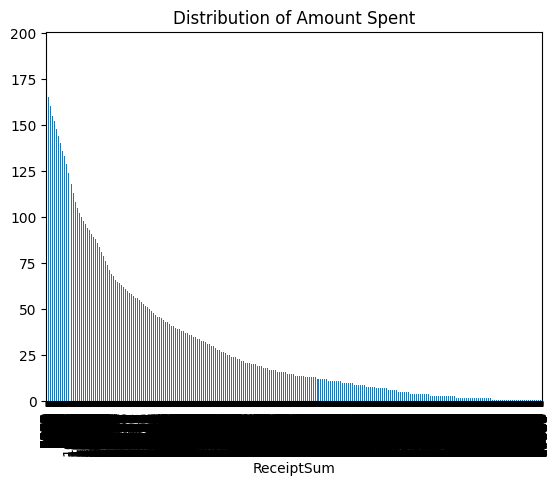

<Axes: title={'center': 'Distribution of Amount Spent'}, xlabel='Age'>

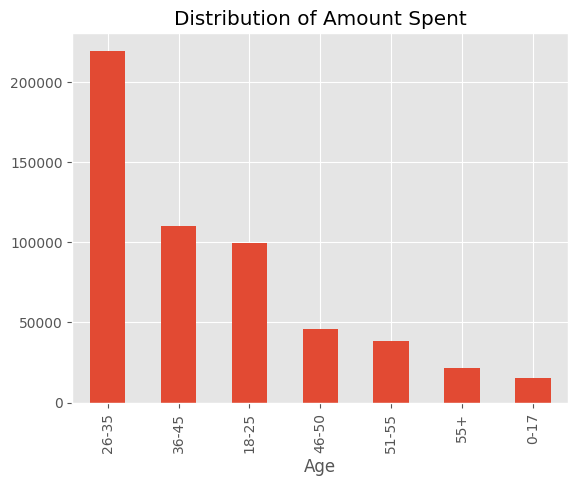

In [ ]:
df['Age'].value_counts().plot(kind='bar', title = 'Distribution of Amount Spent')


Text(0.5, 0, 'Amount Spent')

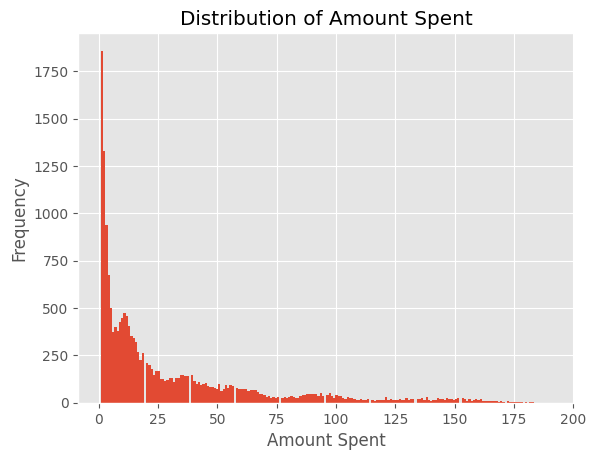

In [ ]:
ax =df['ReceiptSum'].value_counts().plot(kind='hist', bins = 200, title = 'Distribution of Amount Spent')

ax.set_xlabel("Amount Spent")


Text(0.5, 0, 'Amount Spent')

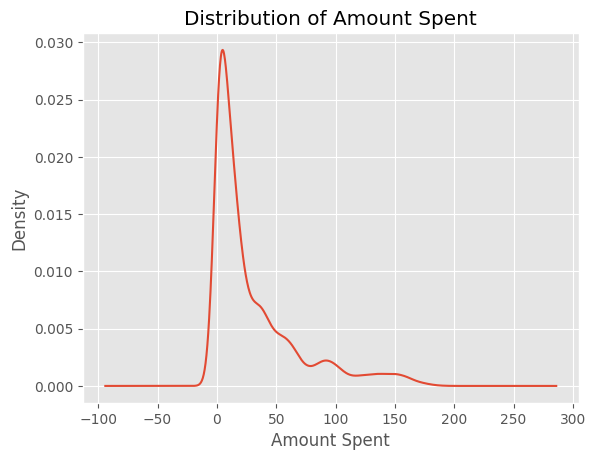

In [ ]:
# Lets do a kernel density plot

ax =df['ReceiptSum'].value_counts().plot(kind='kde',  title = 'Distribution of Amount Spent')

ax.set_xlabel("Amount Spent")


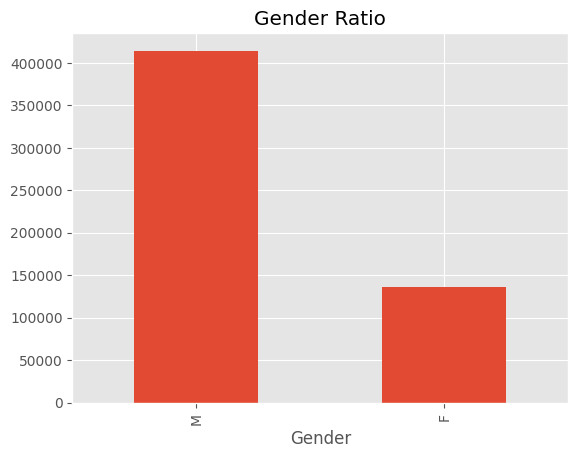

In [ ]:
ax =df['Gender'].value_counts().plot(kind='bar', title = 'Gender Ratio')


Maybe a percentual analysis here (in gender) as it's easier to understand

<Axes: title={'center': 'Distribution of Product Categories'}, xlabel='ProductCategory'>

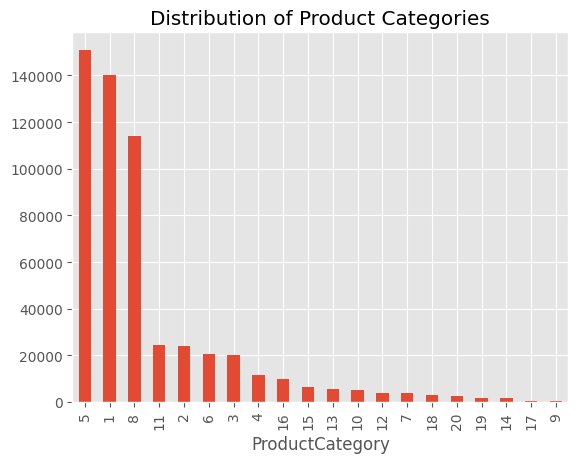

In [ ]:
df['ProductCategory'].value_counts().plot(kind='bar', title = 'Distribution of Product Categories')
#ax =df['ProductCategory'].value_counts().plot(kind='hist', bins = 20, title = 'Distribution of Product Categories')

#ax.set_xlabel("Product Category")

<Axes: title={'center': 'Distribution of City Sales'}, xlabel='City'>

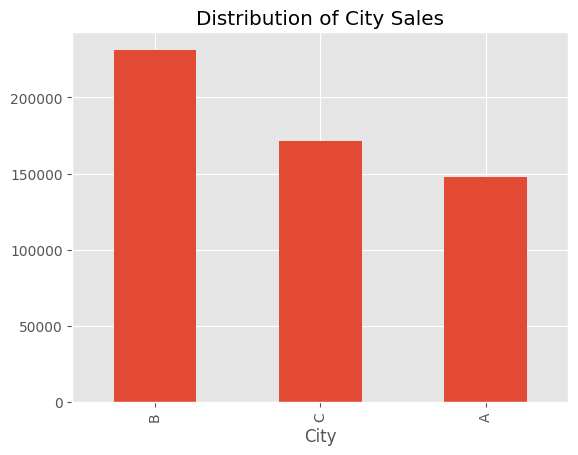

In [ ]:
df['City'].value_counts().plot(kind='bar', title = 'Distribution of City Sales')




# Univariate and Bivariate Analysis

Lets look at our data and try to find some outliers

Text(0, 0.5, 'Product ID')

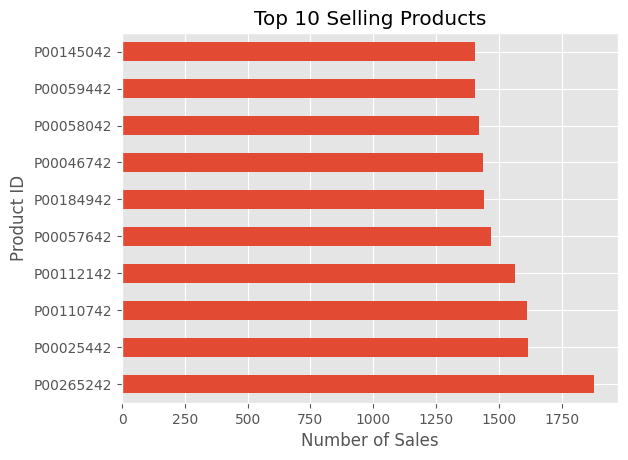

In [ ]:
#Top 10 Best Selling Products
ax = df['ProductID'].value_counts().head(10).plot(kind='barh', title = 'Top 10 Selling Products')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Product ID')

Text(0, 0.5, 'Product Category')

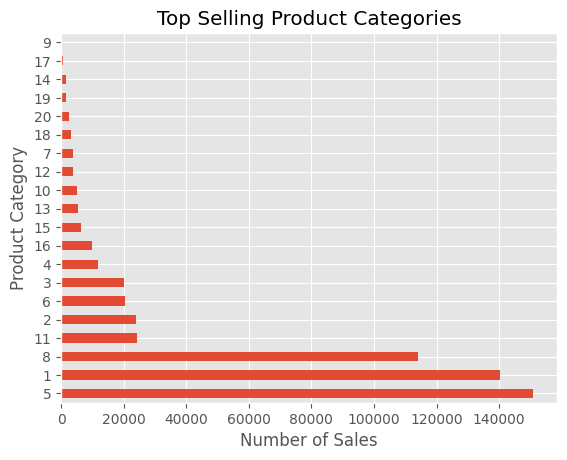

In [ ]:
#Top 10 Best Selling Products
ax = df['ProductCategory'].value_counts().head(20).plot(kind='barh', title = 'Top Selling Product Categories')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Product Category')

Text(0.5, 0, 'Age Range')

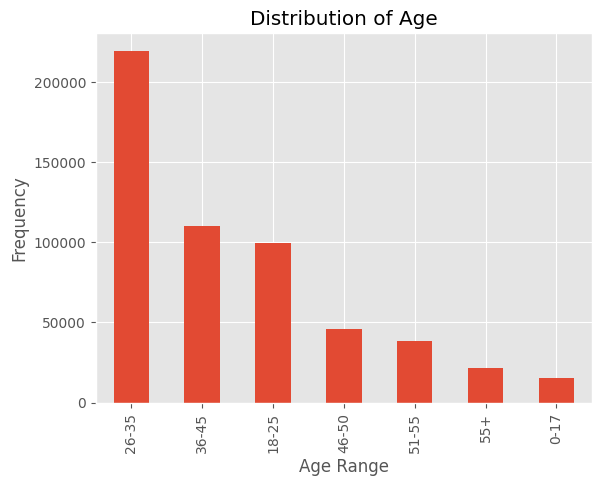

In [ ]:
# Age distribution
ax = df['Age'].value_counts().head(20).plot(kind='bar', title = 'Distribution of Age')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age Range')

Text(0.5, 0, 'Age Range')

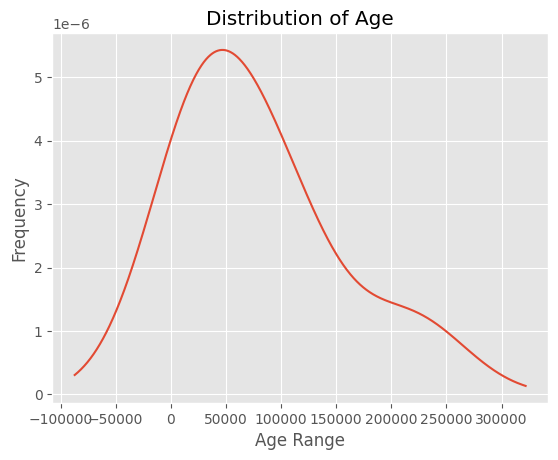

In [ ]:
# Age distribution  - fix bottom
ax = df['Age'].value_counts().head(20).plot(kind='kde', title = 'Distribution of Age')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age Range')

In [ ]:
"""df.plot(kind='scatter', x='Age',
                        y='ProductID', alpha=0.10, s=2,
                        title ='Product Sales By Age')

plt.show()"""



"df.plot(kind='scatter', x='Age',\n                        y='ProductID', alpha=0.10, s=2,\n                        title ='Product Sales By Age')\n\nplt.show()"

In [ ]:
#df.plot.hexbin(x='ProductID', y='Age', gridsize=20)
#plt.show()

<Axes: xlabel='Age', ylabel='ProductID'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


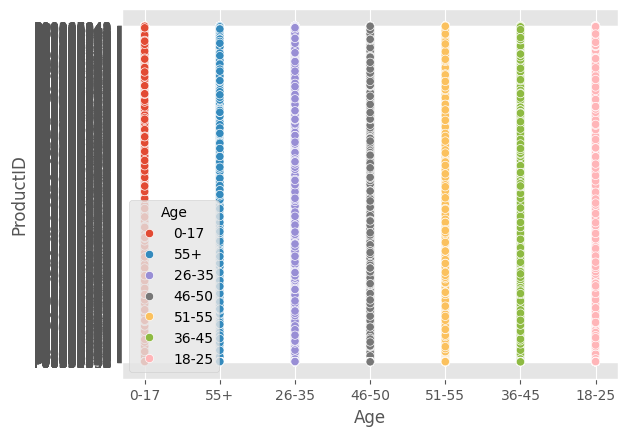

In [ ]:
#Lets use some seaborn

sns.scatterplot(x='Age', y='ProductID', hue='Age', data = df)

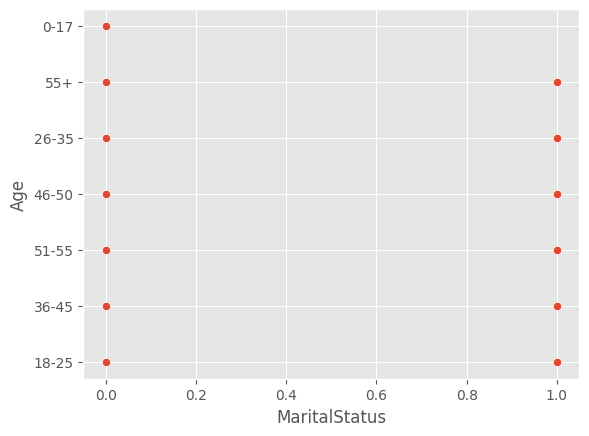

In [ ]:
sns.scatterplot( x='MaritalStatus', y='Age', data = df)

plt.show()

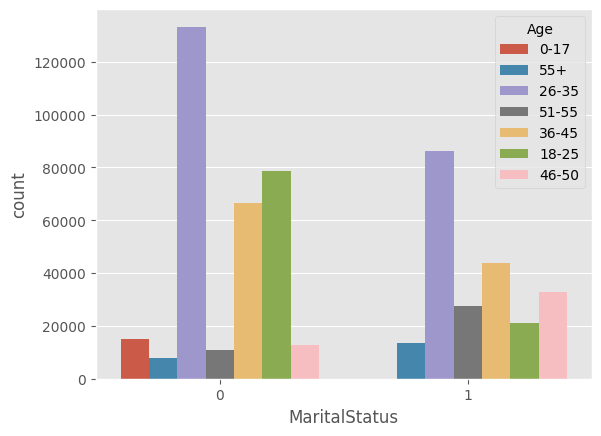

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='MaritalStatus', hue='Age', data=df)
plt.show()


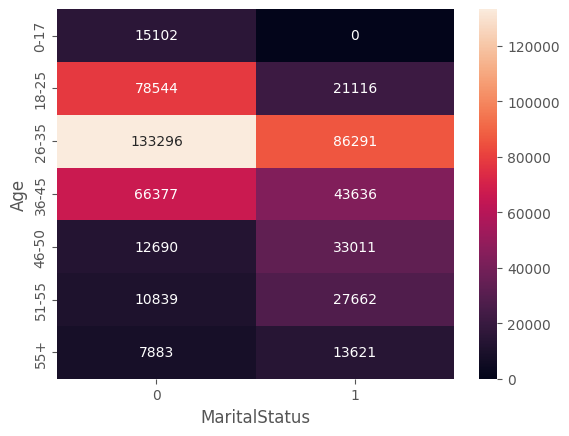

In [ ]:
pivot_table = df.pivot_table(index='Age', columns='MaritalStatus', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt="d")
plt.show()


____________________________________________________________

In [ ]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum',
       'ProductFrequency', 'UserFrequency'],
      dtype='object')

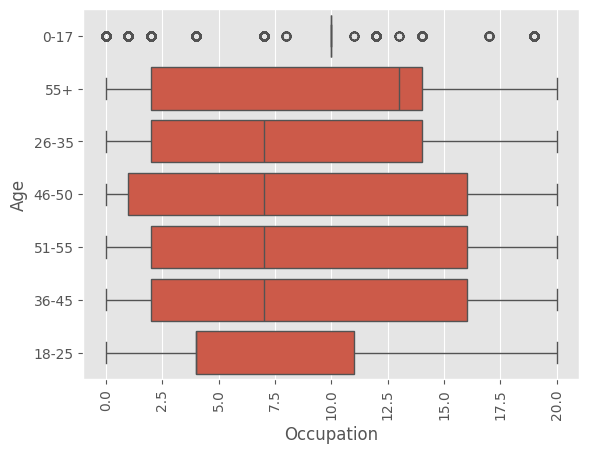

In [ ]:
sns.boxplot(x='Occupation', y='Age', data=df)
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()


__________________________________________________________________________

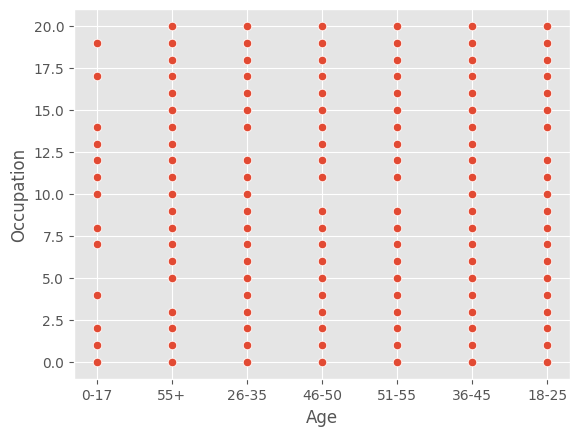

In [ ]:
sns.scatterplot( x='Age', y='Occupation', data = df)

plt.show()

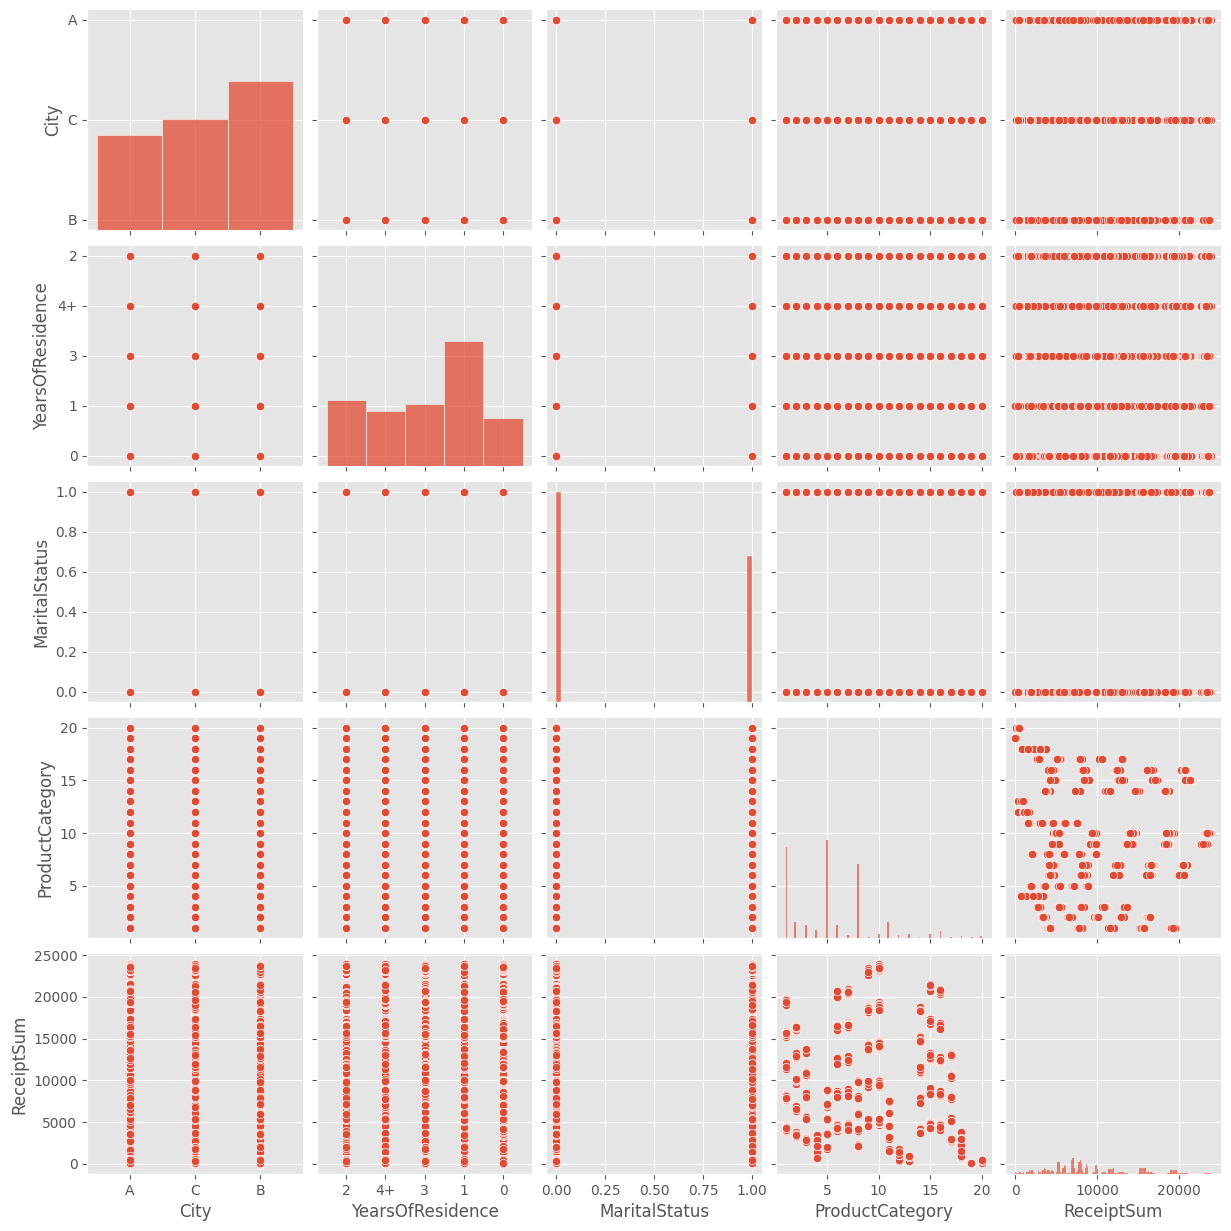

In [ ]:
sns.pairplot( df, vars =['City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum'])

plt.show()

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

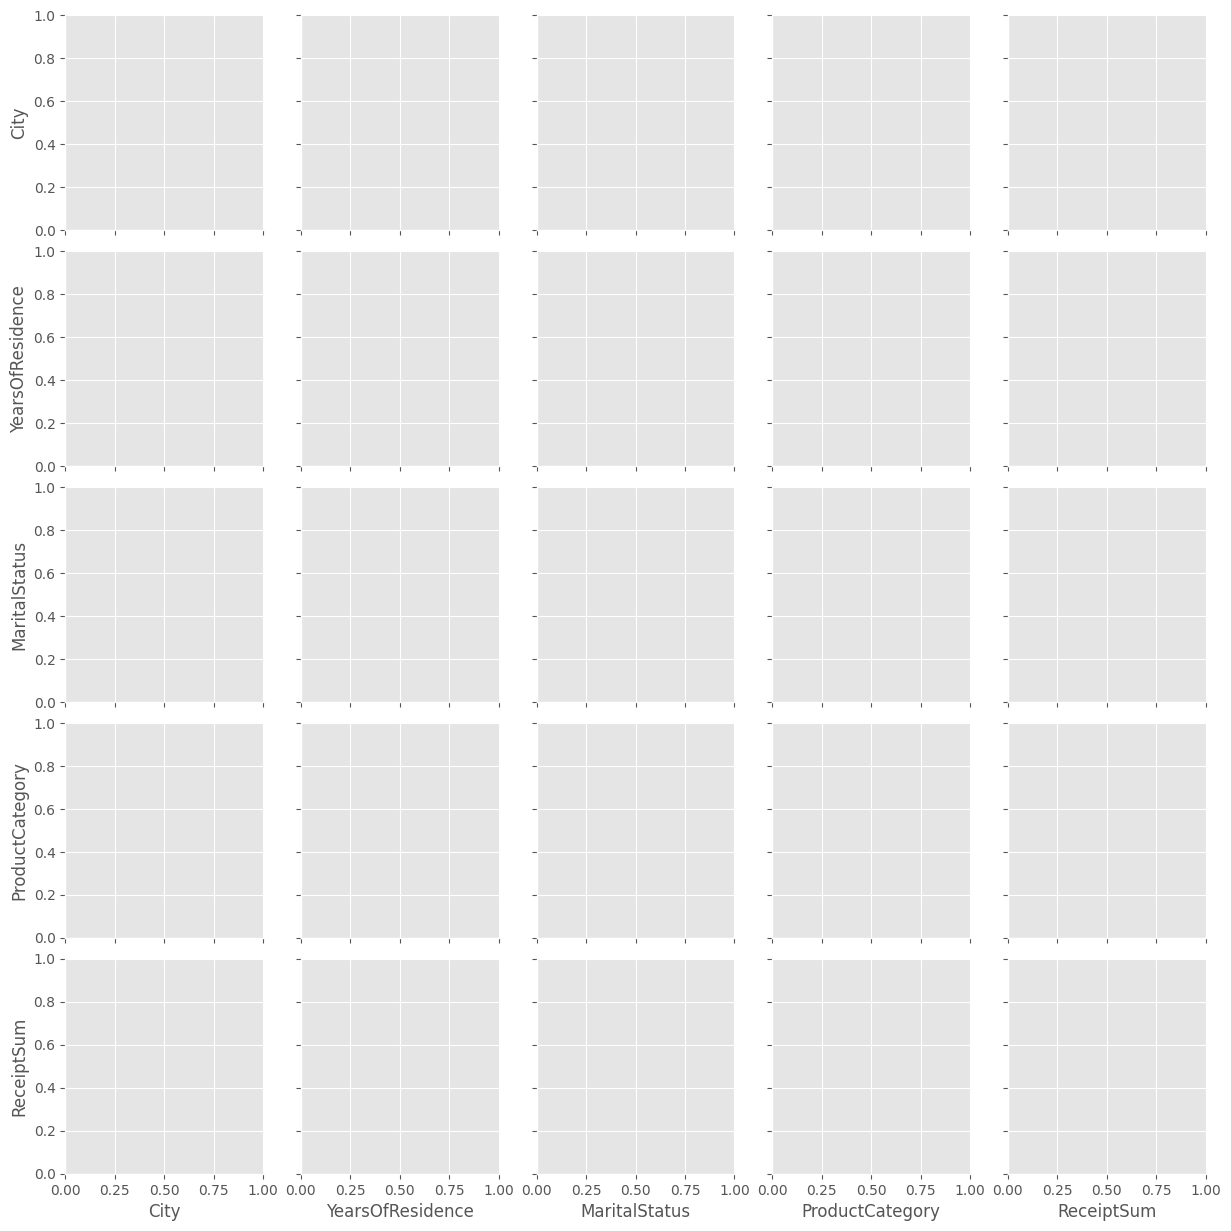

In [ ]:
sns.pairplot( df, vars =['City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum'], hue='ReceiptSum')

plt.show()

In [ ]:
df.head()

In [ ]:
# Lets see how many unique values are in each column
df.nunique()

In [ ]:
df.head()

In [ ]:
sns.heatmap( x='MaritalStatus', y='ProductCategory', data = df)

plt.show()

ValueError: could not convert string to float: 'P00069042'

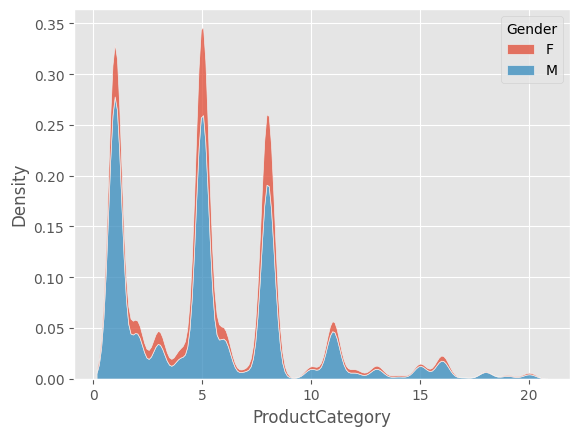

In [ ]:
sns.kdeplot( x='ProductCategory', multiple="stack", hue = 'Gender', data = df)

plt.show()

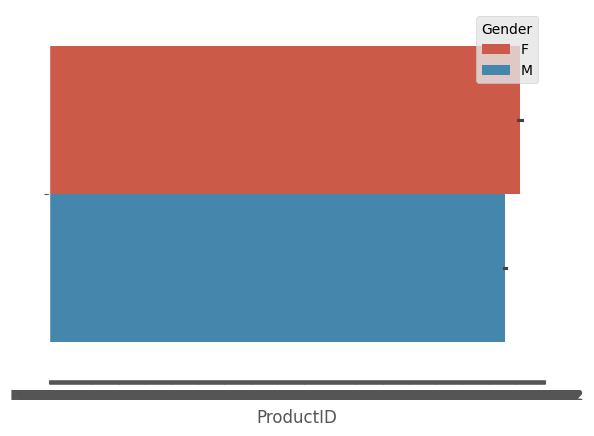

In [ ]:
sns.barplot( hue='Gender', x='ProductID', data = df)

plt.show()

#Running into excessive product IDS

In [ ]:
sns.barplot( y='Gender', x='ProductID', data = df)

plt.show()

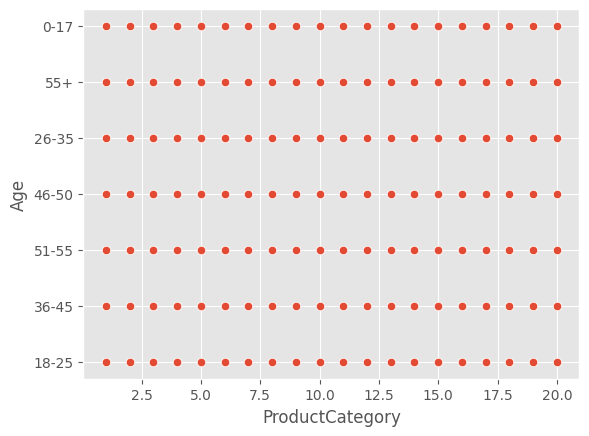

In [ ]:
sns.scatterplot( x='ProductCategory', y='Age', data = df)

plt.show()

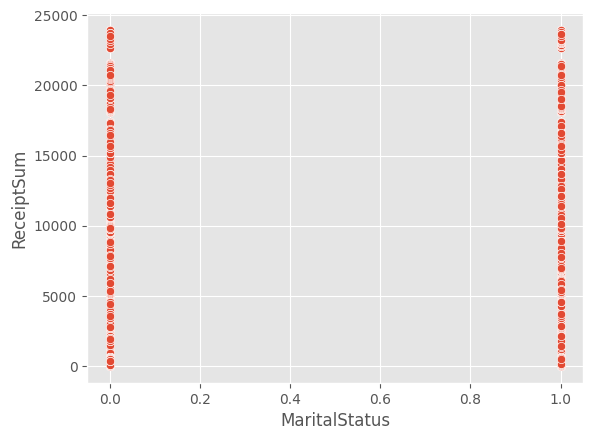

In [ ]:
sns.scatterplot( x='MaritalStatus', y='ReceiptSum', data = df)

plt.show()

Plots to explore

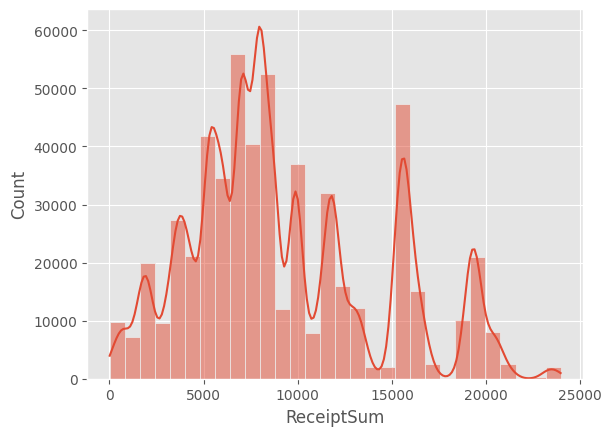

In [ ]:
sns.histplot(df['ReceiptSum'], bins=30, kde=True)
plt.show()


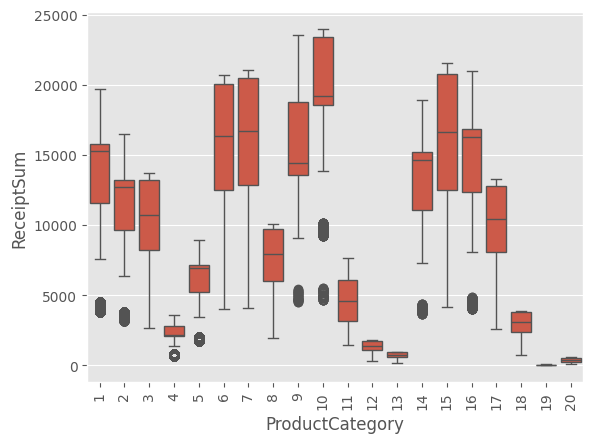

In [ ]:
sns.boxplot(x='ProductCategory', y='ReceiptSum', data=df)
plt.xticks(rotation=90)
plt.show()



In [ ]:
sns.boxplot(x='ProductFrequency', y='ReceiptSum', data=df)
plt.xticks(rotation=90)
plt.show()



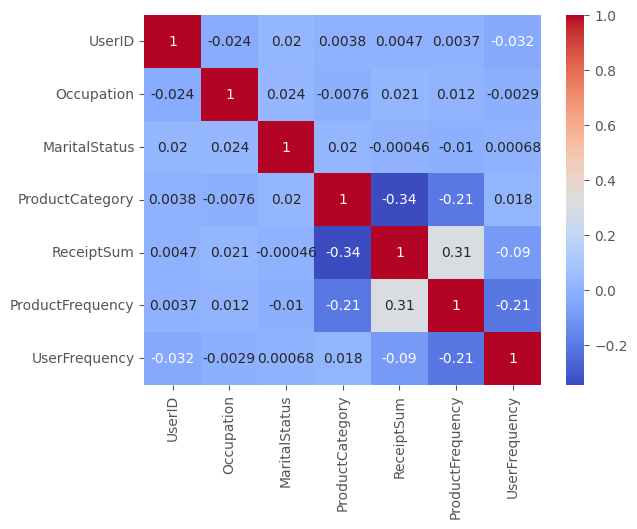

In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr = numerical_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



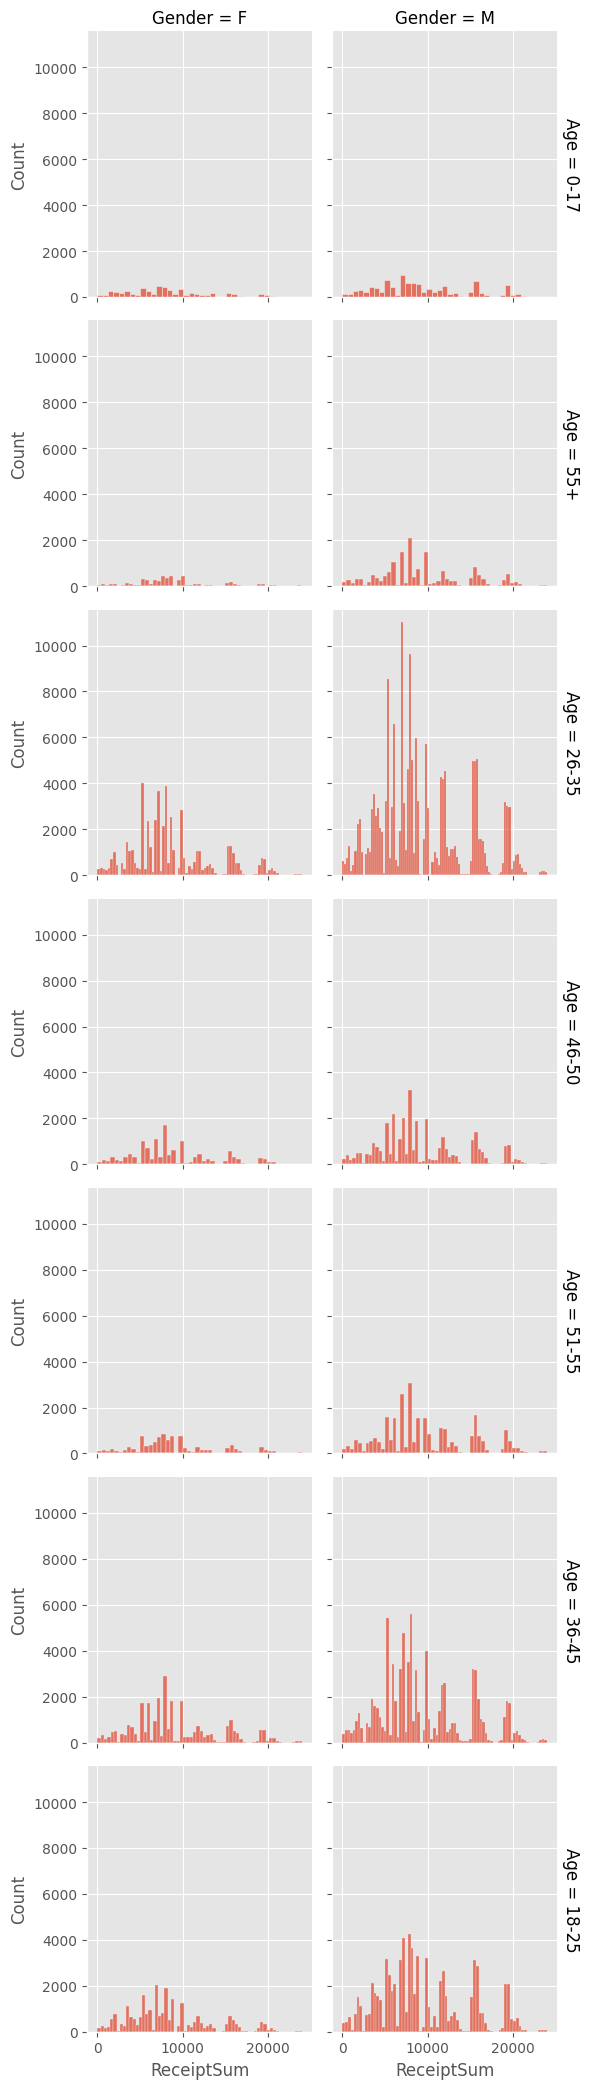

In [ ]:
g = sns.FacetGrid(df, col='Gender', row='Age', margin_titles=True)
g.map(sns.histplot, 'ReceiptSum')
plt.show()


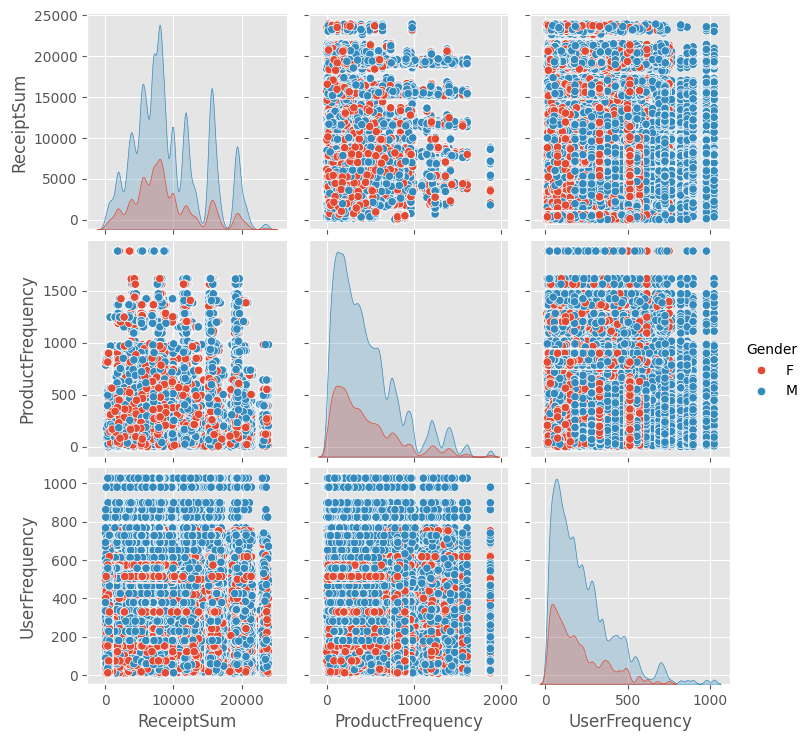

In [ ]:
sns.pairplot(df, vars=['ReceiptSum', 'ProductFrequency', 'UserFrequency'], hue='Gender')
plt.show()


## Supervised Learning Models


Lets start with some Linear regression

In [ ]:
from sklearn import datasets
dataset = df
dataset.head()

In [ ]:
dataset = df
dataset.head()

In [ ]:
df.dtypes  # Lets zoom in a little

In [ ]:
user_frequency = df.groupby('UserID').size().reset_index(name='UserFrequency')
user_frequency.head()

In [ ]:

"""class LinReg:
  def __init__(self, learningrate =.001, iterations = 10):
    self.learningrate = learningrate
    self.interations = interations
    self.weights = None
    self.bias = None

  def fit(self, x, y):
    samples, features = x.shape()
    self.weights =  np.zero() # going to need one weight for each feature
    self.bias = 0 # set bias to 0

# Setting up iterations to run multiple epochs
    for _ in range (self.iterations)
    # y = wx +B
      ypred = np.dot(x, self.weights) + self.bias


    ## calculated gradients
      dw = (1/samples) * np.dot(x.T, (ypred - y))
      db = (1/samples) * np.sum(ypred - y)

  ## Update weights to gradients
      self.weights = self.weights - self.learningrate * dw
      self.weights = self.weights - self.learningrate * dw


  def predict (self, x)
    ypred = np.dot(x, self.weights) + self.bias
    return ypred
"""



In [ ]:
df.columns

Index(['UserID', 'ProductID', 'Gender', 'Age', 'Occupation', 'City',
       'YearsOfResidence', 'MaritalStatus', 'ProductCategory', 'ReceiptSum',
       'ProductFrequency', 'UserFrequency'],
      dtype='object')

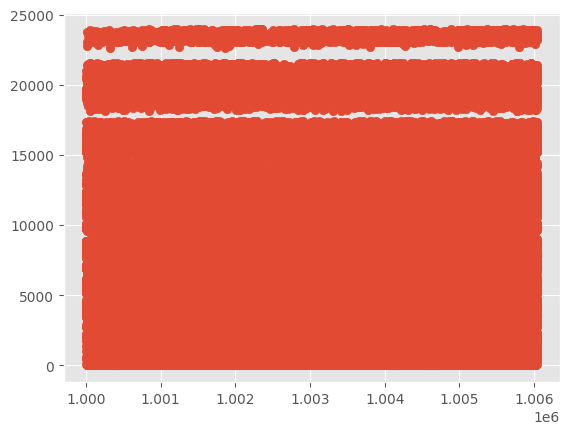

In [ ]:
plt.scatter(df['UserID'], df['ReceiptSum'])



Sample the dataset to avoid large calc - save time - 5000

Train test split
\\
Use one hot encoding on categorical variables in order to turn them into numerical variables - does apply to city a,b,c, -- turns them into 100 101 102 or so -


Use reciept sum as target variable - make sure to drop columns product /user id


Build models with this - check code is working

then use dataset

Create a new doc for models



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
df = df.sample(frac=0.01)

In [ ]:
X =df[['Gender', 'Age', 'Occupation', 'City',
       'YearsOfResidence', 'MaritalStatus']]  # reducing plotting and distributions

In [ ]:
##One hot encoding  #check different types
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, drop_first=True, dtype= float)

In [ ]:
X.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Occupation_18,Occupation_19,Occupation_20,City_B,City_C,YearsOfResidence_1,YearsOfResidence_2,YearsOfResidence_3,YearsOfResidence_4+,MaritalStatus_1
31470,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
179313,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
405754,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
284083,True,False,False,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
189051,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True


In [ ]:
X.describe()

TypeError: 'int' object is not iterable

In [ ]:
y= df[['ReceiptSum']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse", mse, r2)

NameError: name 'train_test_split' is not defined